# Breast Cancer Prediction Project

Welcome to the Breast Cancer Prediction project! 🎯

In this beginner-friendly notebook, we'll walk through a step-by-step machine learning pipeline to predict whether a tumor is malignant or benign based on various features.

## 🔍 Objective

Our goal is to build a machine learning model that can accurately predict whether a tumor is **malignant (M)** or **benign (B)** based on a set of measurements.

We'll use the dataset `Cancer_Data.csv` for this purpose.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## 📥 Step 1: Load the Dataset

In [9]:
df = pd.read_csv('Cancer_Data.csv')

## 🔍 Step 2: Explore the Dataset

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
print(df.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## 🧹 Step 3: Clean the Data

We'll remove any unnecessary columns and handle missing values.

In [7]:
# Drop the 'Unnamed: 32' column and 'id'
df = df.drop(['id'], axis=1)
df = df.dropna(axis=1, how='all')
print(df.isnull().sum())

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


## 📊 Step 4: Visualize the Data

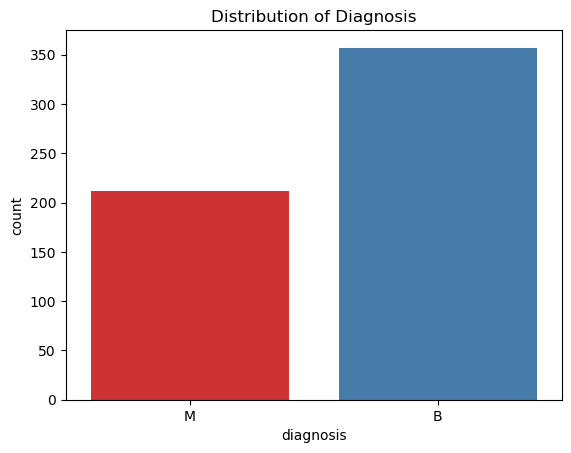

In [9]:
sns.countplot(x='diagnosis', data=df, hue='diagnosis', palette='Set1', legend=False)
plt.title('Distribution of Diagnosis')
plt.show()

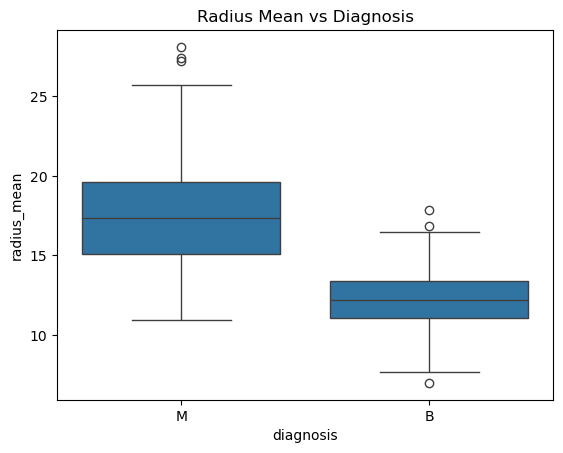

In [10]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Radius Mean vs Diagnosis')
plt.show()

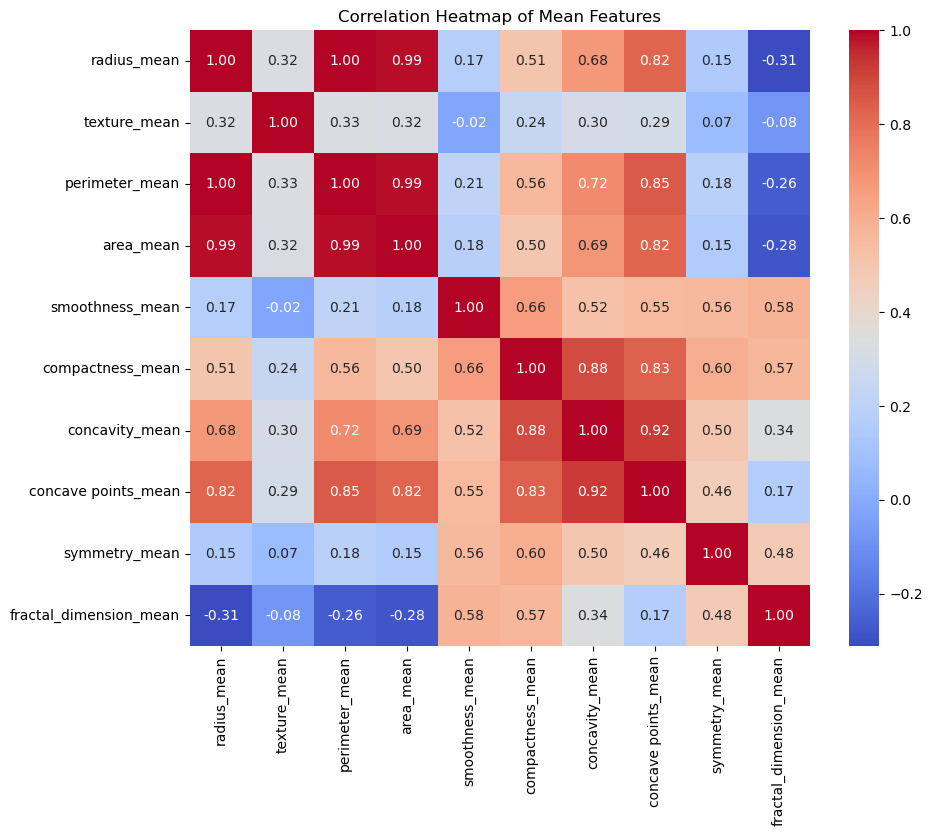

In [6]:
# Select only the first 10 columns for a clear heatmap
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
        'smoothness_mean', 'compactness_mean', 'concavity_mean', 
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

plt.figure(figsize=(10, 8))
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Mean Features')
plt.show()

## ⚙️ Step 5: Preprocess the Data

In [11]:
# 1. Convert 'M' and 'B' into 1 and 0
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# 2. DROP THE PROBLEM COLUMNS
# 'id' is useless, and 'Unnamed: 32' is full of NaN values which cause the warning
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# 3. DOUBLE CHECK: Are there any other NaNs?
# This should print 0. If it's not 0, scaling will fail.
print(f"Total missing values remaining: {df.isnull().sum().sum()}")

# 4. Separate Features (X) and Target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# 5. Split into Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Scale the data (This will now run without warnings!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Preprocessing complete with no errors!")

Total missing values remaining: 0
Preprocessing complete with no errors!


## 🤖 Step 6: Train a Machine Learning Model

In [12]:
# Use Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

print("The model has been trained!")

The model has been trained!


## 🧪 Step 7: Evaluate the Model

Accuracy: 97.37%


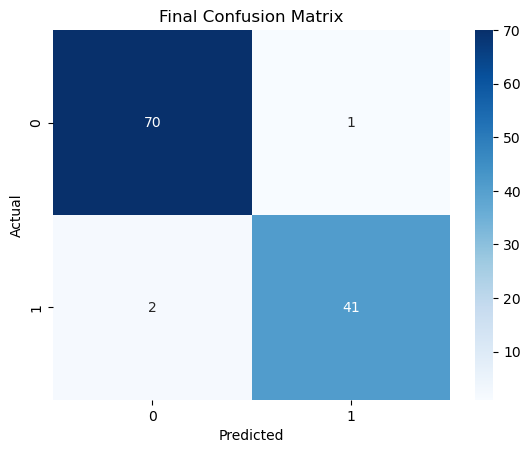


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [14]:
# Make predictions
y_pred = model.predict(X_test)

# Print Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Final Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

## ✅ Conclusion

Awesome work! 🎉

You've successfully built a breast cancer prediction model using Logistic Regression. You explored the data, cleaned it, visualized it, trained a model, and evaluated its performance.

### 🚀 Next Steps
- Try different models like RandomForest or SVM
- Perform feature selection
- Tune hyperparameters for better accuracy

In [17]:
import pickle

# ... (after you have defined X and trained your model)

# 1. Get the list of features
feature_names = X.columns.tolist()

# 2. Save all THREE files
pickle.dump(model, open('cancer_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(feature_names, open('features.pkl', 'wb')) # THIS IS THE MISSING FILE

print("All files saved!")

All files saved!


In [18]:
feature_names = X.columns.tolist()
pickle.dump(feature_names, open('features.pkl', 'wb'))